Data Processing before building machine learning Model
----------------------------------------------------------------------------------

Steps of Preprocessing of data
--------------------------------------------

Step 1] - Import necessary libararies .
Step 2] - Read Data Set .
Step 3] - Sanity Check of Data
Step 4] - Exploratory Data Analysis [EDA]
Step 5] - Missing Value Treatments
Step 6] - Outliers Treatments.
Step 7] - Duplicates and Garbage Value treatment.
Step 8] - Normalization 
Step 9] - Encoding of Data  

# Step 1: Import Necessary Library

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Read DataSet

In [4]:
df=pd.read_csv("C:\\Users\\rajan\\Downloads\\house_price.csv")

In [6]:
#head
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [7]:
#tail
df.tail()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689
13196,other,4 BHK,3600.0,5.0,400.0,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4,10407
13199,Doddathoguru,1 BHK,550.0,1.0,17.0,1,3090


# Step 3: Sanity Check of Data

In [75]:
#Shape
df.shape

(13200, 7)

In [76]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [11]:
#Finding Missing Values
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [13]:
#For Finding The Percentage of Missing Value
df.isnull().sum()/df.shape[0]*100

location          0.0
size              0.0
total_sqft        0.0
bath              0.0
price             0.0
bhk               0.0
price_per_sqft    0.0
dtype: float64

In [17]:
#Finding Duplicates 
df.duplicated().sum()

1049

In [77]:
#Identifying Garbage Value
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*15)

location
other              2872
Whitefield          533
Sarjapur  Road      392
Electronic City     304
Kanakpura Road      264
                   ... 
Doddaballapur        11
Tindlu               11
Marsur               11
HAL 2nd Stage        11
Kodigehalli          11
Name: count, Length: 241, dtype: int64
*********************************************
size
2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64
**********************

In [ ]:
#No garbage values

# Step 4- Exploratory Data Analysis

In [78]:
#Descriptive Statistics
df.describe()  #Numerical Column


,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [11]:
df.describe(include="object")

,location,size
count,13200,13200
unique,241,31
top,other,2 BHK
freq,2872,5192


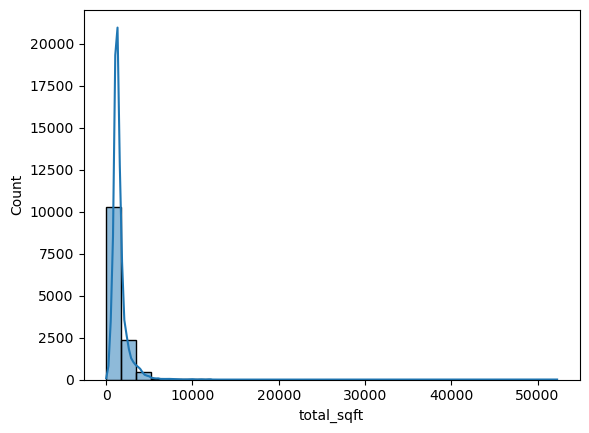

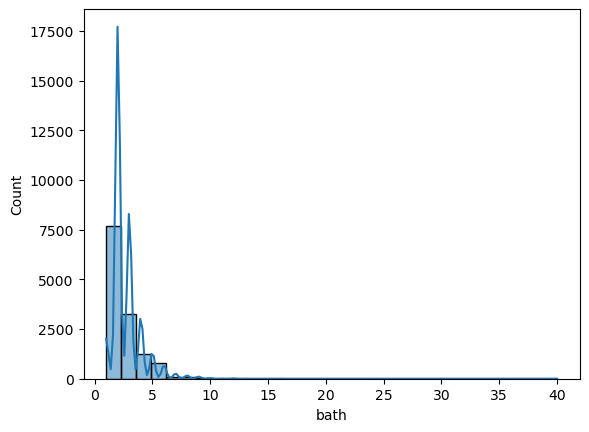

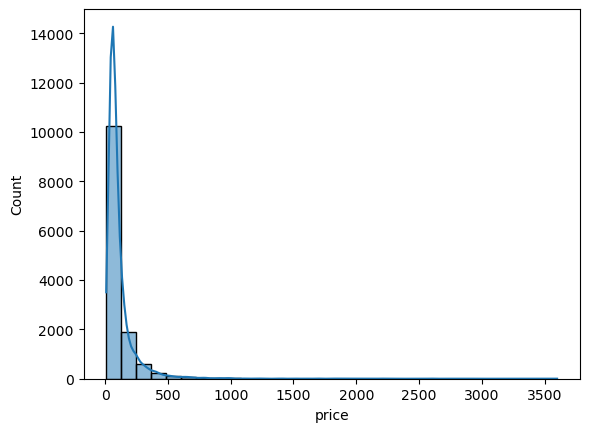

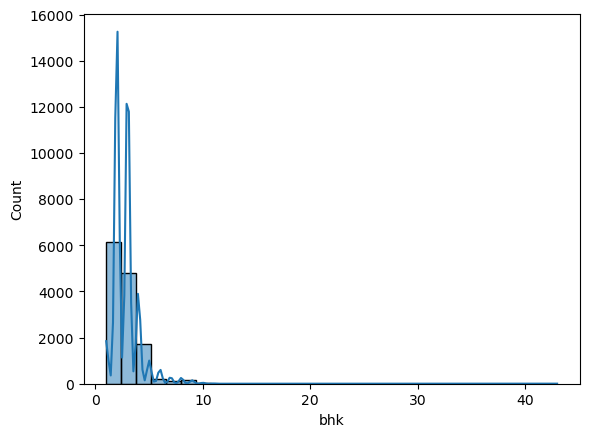

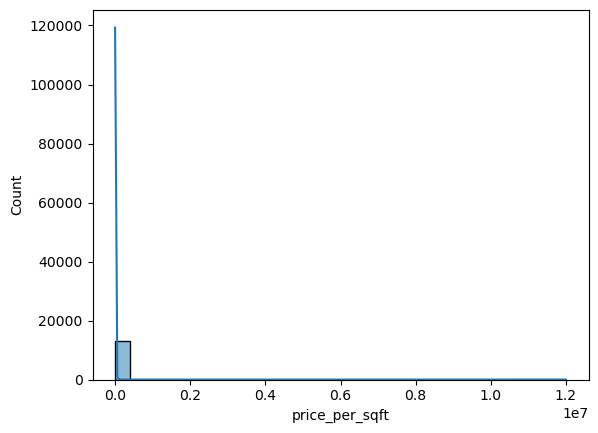

In [5]:
#Histogram to understand the distribution 
import warnings as wr
wr.filterwarnings("ignore")

for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i,bins=30,kde='True')
  plt.show()

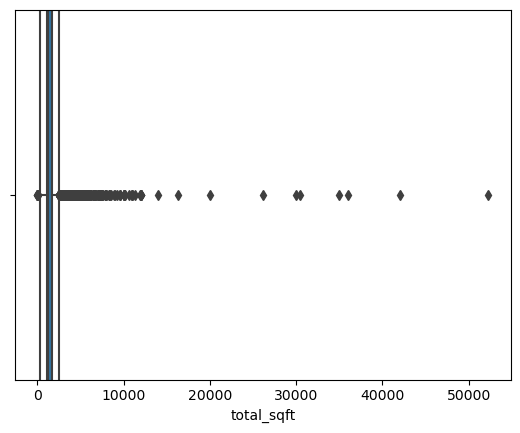

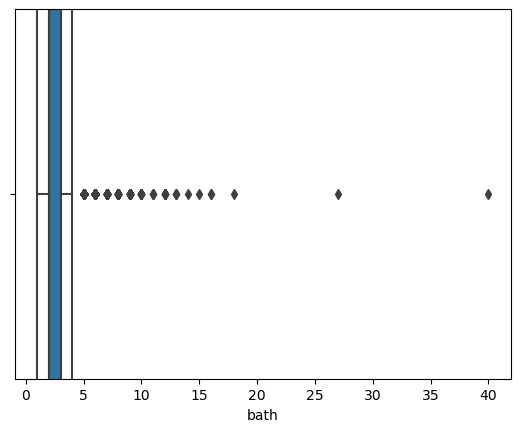

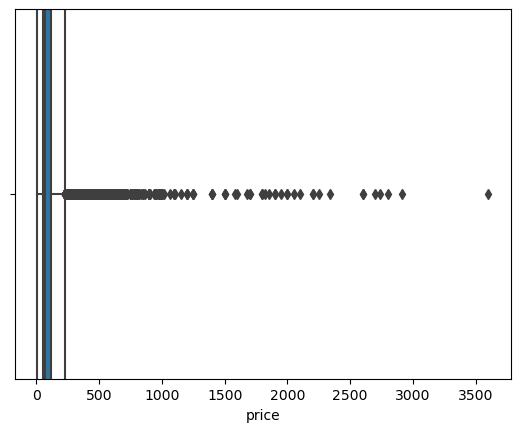

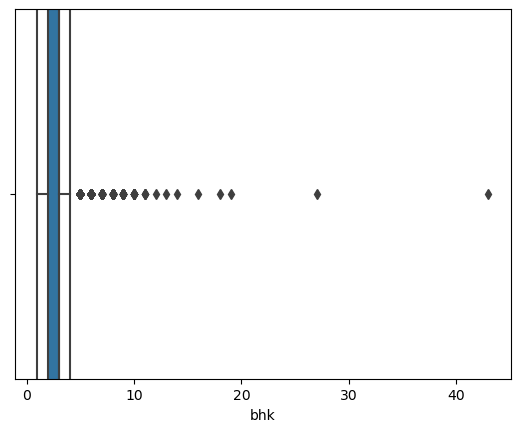

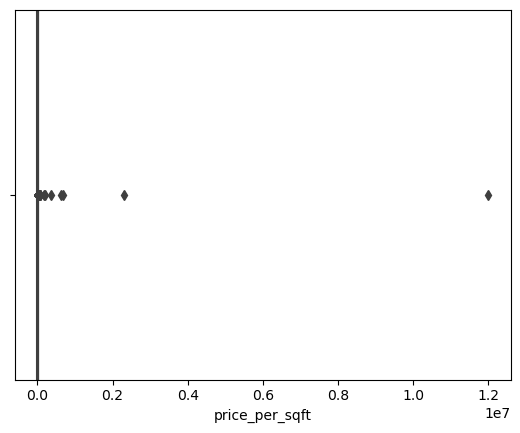

In [29]:
#Boxplot to understand the ouliers 
import warnings as wr
wr.filterwarnings("ignore")

for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i,width=1000)
  plt.show()

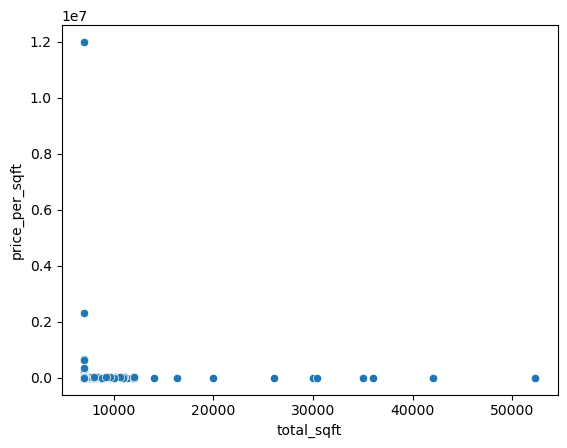

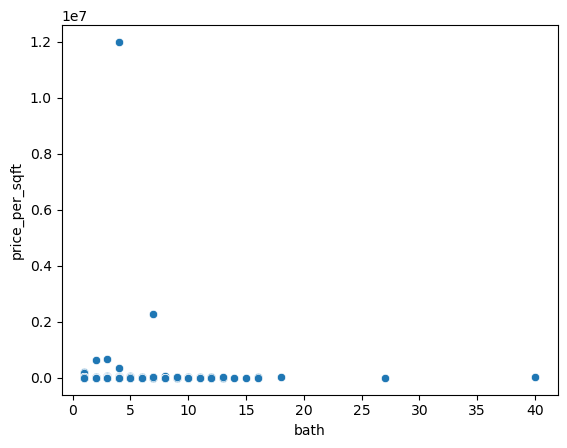

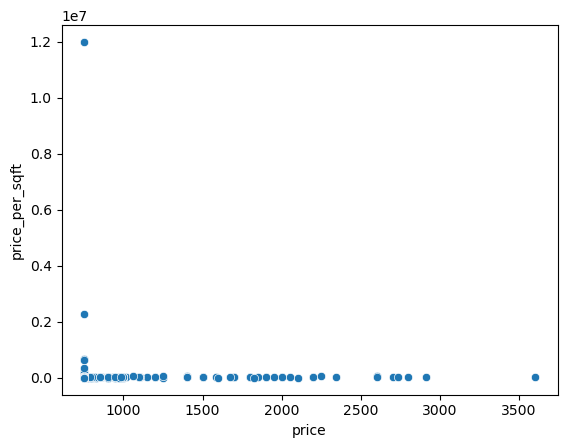

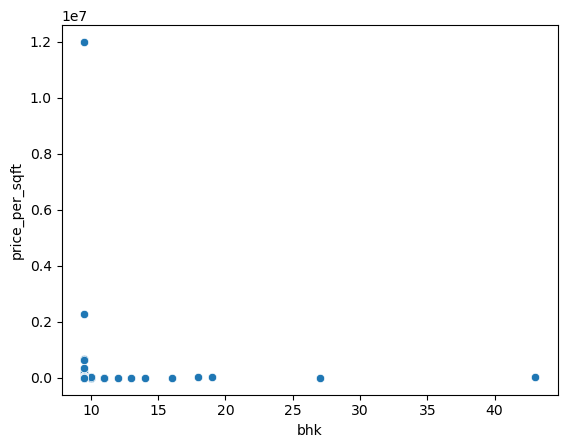

In [59]:
#Scatter Plot to understand the relationships
for i in ['total_sqft', 'bath', 'price', 'bhk']:
   sns.scatterplot(data=df,x=i,y='price_per_sqft')
   plt.show()

In [87]:
df.select_dtypes(include="number").columns

Index(['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft'], dtype='object')

In [88]:
#Correlation with heat map to interpret the relation
s=df.select_dtypes(include='number').corr()

<Axes: >

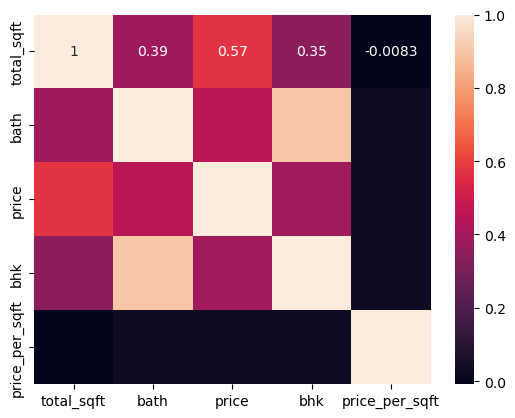

In [89]:
#plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)

# Step:5 -  Missing Value Treatments

In [ ]:
# Choose the methodes of imputing missing values 3
# Mean, Median , Mode , KNNImputer
 
#No Missing value. So no need of impuations in this dataset.

# Step : 6- Outliers treatment

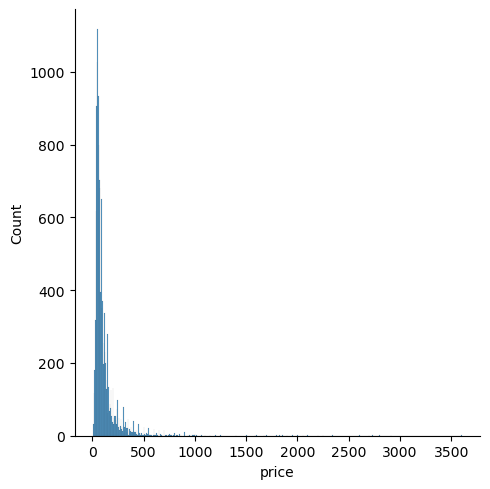

In [7]:
sns.displot(df['price'])

<Axes: >

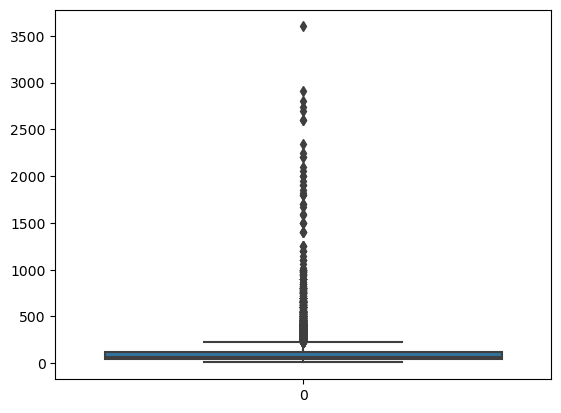

In [32]:
sns.boxplot(df['price'])

In [ ]:
#IQR Methode, Percentile

In [56]:
#Decide whether to do outlier treatment or not , if do how?
# Doing outlier treatment for continues columns. Price and squarefeet

def whisker(col):
   q1,q3=np.percentile(col,[5,95])
   iqr=q3-q1
   lw=q1-1.5*iqr
   uw=q3+1.5*iqr
   return lw,uw,iqr

In [69]:
whisker(df['price'])

(-400.025, 752.015)

In [58]:
for i in('price','bhk','total_sqft'):
    lw,uw,iq=whisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]<uw,uw,df[i])
    print(lw,uw,iq)

752.015 752.015 0.0
9.5 9.5 0.0
7033.449999999981 7033.449999999981 0.0


In [54]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

# Z-Score Methode

In [50]:
#Find the limits
upper_limit=df['total_sqft'].mean()+3*df['total_sqft'].std()
lower_limit=df['total_sqft'].mean()-3*df['total_sqft'].std()
print("upper_limit:",upper_limit, "\nlower_limit",lower_limit)


upper_limit: 5267.273119159083 
lower_limit -2156.6675532499917


In [51]:
# Find the outliers
df.loc[(df['total_sqft']>upper_limit) | (df['total_sqft']<lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
61,Whitefield,4 Bedroom,5700.0,5.0,650.0,4,11403
120,Hebbal,4 BHK,5611.5,4.0,477.0,4,8500
404,Rajaji Nagar,7 BHK,12000.0,6.0,2200.0,7,18333
435,Whitefield,4 Bedroom,11890.0,4.0,700.0,4,5887
509,Banashankari Stage III,4 Bedroom,8500.0,4.0,145.0,4,1705
...,...,...,...,...,...,...,...
12976,other,4 BHK,6652.0,6.0,660.0,4,9921
13000,other,4 Bedroom,6688.0,6.0,700.0,4,10466
13078,other,4 Bedroom,9200.0,4.0,2600.0,4,28260
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000


In [52]:
#trimming

new_def= df.loc[(df['total_sqft']<upper_limit) | (df['total_sqft']>lower_limit)]
print("Old Data:",len(df))
print("New Data:",len(new_def))

Old Data: 13200
New Data: 13200


<Axes: >

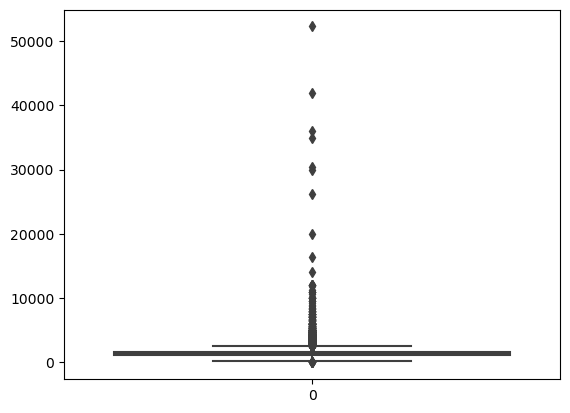

In [42]:
sns.boxplot(new_def['total_sqft'])

In [46]:
#Capping -Change the outlier values to upper (or) lower limit values
new_def=df.copy()
new_def.loc[new_def['total_sqft']>upper_limit,'total_sqft']=upper_limit
new_def.loc[new_def['total_sqft']>lower_limit,'total_sqft']=lower_limit

<Axes: >

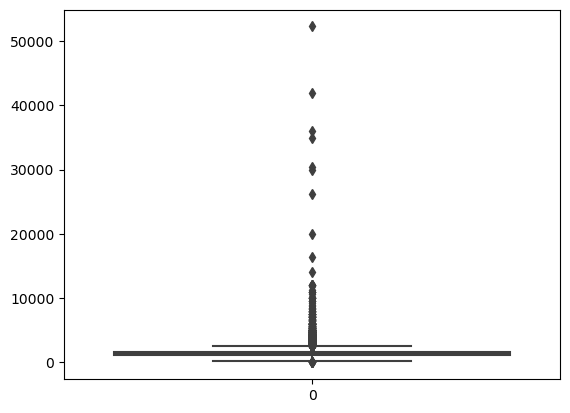

In [53]:
sns.boxplot(new_def['total_sqft'])

<Axes: >

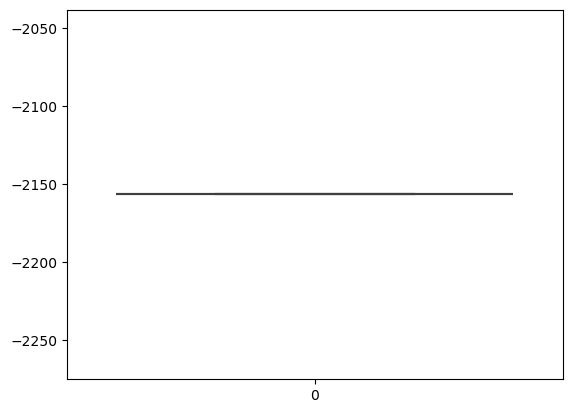

In [54]:
#Capping -Change the outlier values to upper (or) lower limit values
new_def=df.copy()
new_def.loc[new_def['price']>upper_limit,'price']=upper_limit
new_def.loc[new_def['price']>lower_limit,'price']=lower_limit

sns.boxplot(new_def['price'])

# Mean,Median,Mode

In [80]:
m=df.price.mean()
m

112.27617765151514

In [81]:
s=df.price.std()
s

149.17599517809657

In [82]:
m-3*s  #-3sigma

-335.2518078827746

In [83]:
m+3*s  # +3sigma


559.8041631858049

In [84]:
df["price"]=(df.price-m)/s  #z=  x-mean/std

In [67]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,7033.45,2.0,-0.057296,9.5,3699,-0.057296
1,Chikka Tirupathi,4 Bedroom,7033.45,5.0,-0.057296,9.5,4615,-0.057296
2,Uttarahalli,3 BHK,7033.45,2.0,-0.057296,9.5,4305,-0.057296
3,Lingadheeranahalli,3 BHK,7033.45,3.0,-0.057296,9.5,6245,-0.057296
4,Kothanur,2 BHK,7033.45,2.0,-0.057296,9.5,4250,-0.057296
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,7033.45,4.0,-0.057296,9.5,6689,-0.057296
13196,other,4 BHK,7033.45,5.0,-0.057296,9.5,11111,-0.057296
13197,Raja Rajeshwari Nagar,2 BHK,7033.45,2.0,-0.057296,9.5,5258,-0.057296
13198,Padmanabhanagar,4 BHK,7033.45,4.0,-0.057296,9.5,10407,-0.057296


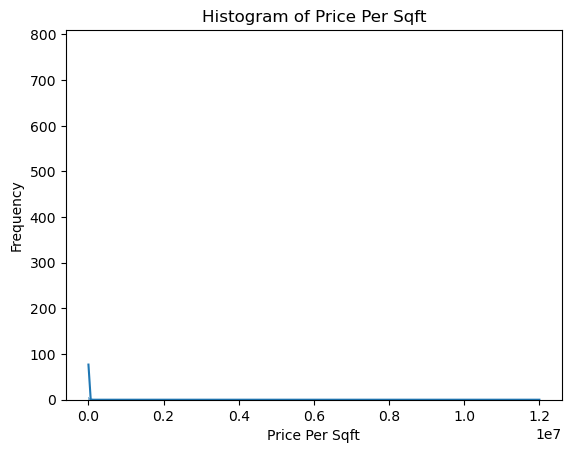

In [10]:
import seaborn as sns
wr.filterwarnings("ignore")

sns.histplot(df['price_per_sqft'],kde='True')
plt.title('Histogram of Price Per Sqft')
plt.xlabel('Price Per Sqft')
plt.ylabel('Frequency')
plt.show()


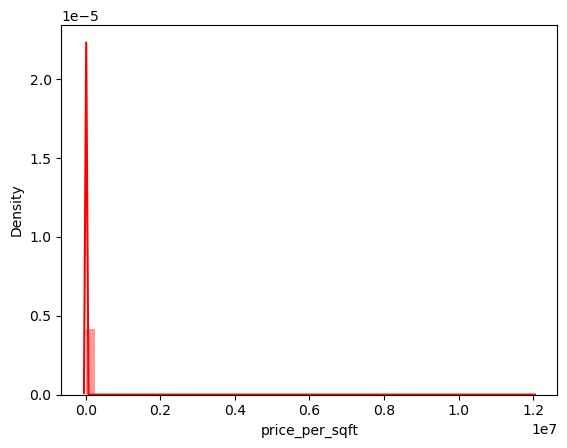

In [8]:
import seaborn as sns
wr.filterwarnings("ignore")

sns.distplot(df["price_per_sqft"],color='r')
plt.show()


In [12]:
from scipy.stats import skew, kurtosis

In [10]:
df['price'].skew()

8.1001908436817

In [13]:
kurtosis(df['price'],fisher=False)  

111.5622509727068

In [15]:
df['log_price']=np.log(df["price"])

In [16]:
df['log_price']

0        3.665355
1        4.787492
2        4.127134
3        4.553877
4        3.931826
           ...   
13195    5.442418
13196    5.991465
13197    4.094345
13198    6.190315
13199    2.833213
Name: log_price, Length: 13200, dtype: float64

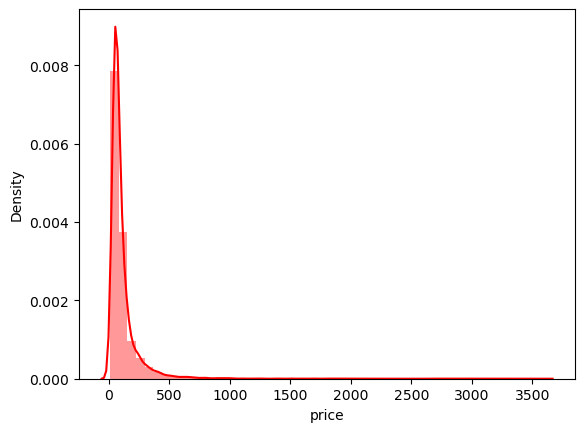

In [15]:
wr.filterwarnings("ignore")

sns.distplot(df["price"],color='r')
plt.show()

In [18]:
df['log_price'].skew()

0.8431357960666708

In [19]:
kurtosis(df['log_price'],fisher=False)

4.35029920656377

In [13]:
old_df=pd.read_csv("C:\\Users\\rajan\\Downloads\\house_price.csv")

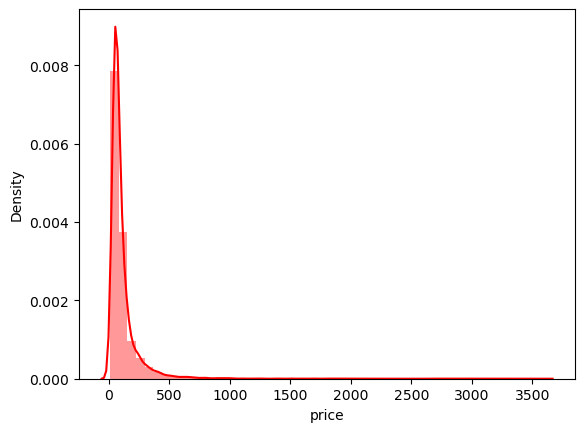

In [14]:
wr.filterwarnings("ignore")

sns.distplot(old_df["price"],color='r')
plt.show()